In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train = pd.read_csv("../Data/X_train_res.csv")
X_test = pd.read_csv("../Data/X_test.csv")
y_train = pd.read_csv("../Data/y_train_res.csv")
y_test = pd.read_csv("../Data/y_test.csv")

In [3]:
X_train.head(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,1.733845,1,0,0,0,-0.989938,-0.775637,0,1,0,0,0,1,0
1,0,1.153296,0,0,1,0,2.699503,1.025293,0,0,1,0,0,1,0
2,0,0.483432,0,0,1,1,2.301763,1.243978,0,1,0,0,0,1,0


In [4]:
cols = X_train.columns.to_list()

In [5]:
fixed_features = ["age", "hypertension", "heart_disease", "avg_glucose_level",
                  "bmi", "formerly smoked", "never smoked", "smokes"]

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [7]:
sfs = SFS(rfc,
          k_features=10,
          floating=False,
          forward=True,
          verbose = 1,
          fixed_features = fixed_features,
          scoring="roc_auc",
          n_jobs = -1,
          cv=5)

In [8]:
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    5.9s finished
Features: 9/10[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.5s finished
Features: 10/10

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          fixed_features=['age', 'hypertension',
                                          'heart_disease', 'avg_glucose_level',
                                          'bmi', 'formerly smoked',
                                          'never smoked', 'smokes'],
                          k_features=10, n_jobs=-1, scoring='roc_auc',
                          verbose=1)

In [9]:
sfs.subsets_

{8: {'feature_idx': (1, 2, 3, 6, 7, 12, 13, 14),
  'cv_scores': array([0.9351261 , 0.93543228, 0.94983482, 0.95401672, 0.94992528]),
  'avg_score': 0.9448670400939164,
  'feature_names': ('age',
   'hypertension',
   'heart_disease',
   'avg_glucose_level',
   'bmi',
   'formerly smoked',
   'never smoked',
   'smokes')},
 9: {'feature_idx': (1, 2, 3, 6, 7, 10, 12, 13, 14),
  'cv_scores': array([0.94412618, 0.94128596, 0.95882282, 0.96057595, 0.95704188]),
  'avg_score': 0.9523705577605682,
  'feature_names': ('age',
   'hypertension',
   'heart_disease',
   'avg_glucose_level',
   'bmi',
   'Self-employed',
   'formerly smoked',
   'never smoked',
   'smokes')},
 10: {'feature_idx': (1, 2, 3, 5, 6, 7, 10, 12, 13, 14),
  'cv_scores': array([0.95062445, 0.95939489, 0.95875433, 0.96057595, 0.96235308]),
  'avg_score': 0.9583405408851993,
  'feature_names': ('age',
   'hypertension',
   'heart_disease',
   'Residence_type',
   'avg_glucose_level',
   'bmi',
   'Self-employed',
   'formerl

In [10]:
selected_features = list(sfs.subsets_[10]["feature_names"])

In [11]:
X_train[selected_features]

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,Self-employed,formerly smoked,never smoked,smokes
0,1.733845,1,0,0,-0.989938,-0.775637,0,0,1,0
1,1.153296,0,0,0,2.699503,1.025293,1,0,1,0
2,0.483432,0,0,1,2.301763,1.243978,0,0,1,0
3,0.349459,0,0,0,0.003512,0.497878,0,0,1,0
4,-1.704791,0,0,0,-0.690283,-1.225869,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3538,1.284198,0,0,0,-0.170019,-0.260004,0,0,0,1
3539,1.143975,0,0,0,-0.067101,-0.359513,0,0,0,1
3540,0.691703,0,0,0,-0.185771,-0.051407,0,0,0,1
3541,1.117782,0,0,0,-0.173423,-0.281427,0,0,0,1


In [12]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

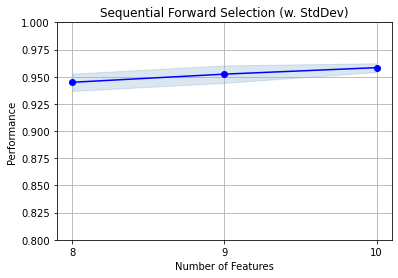

In [13]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

# END